In [67]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Load the data into a pandas dataframe
data = pd.read_csv('house_price_train_test_sets.csv')

# Encode categorical variables using pandas get_dummies method
data = pd.get_dummies(data, columns=['Neighborhood', 'BldgType', 'HouseStyle'])

# Preview the data after encoding
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... BldgType_Twnhs BldgType_TwnhsE HouseStyle_1.5Fin  \
0         Lvl    AllPub  ...              0               0                 0   
1         Lvl    AllPub  ...              0               0                 0   
2         Lvl    AllPub  ...              0               0                 0   
3         Lvl    AllPub  ...              0               0                 0   
4         Lvl    AllPub  ...              0               0                 0   

  HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyl

SalePrice summary statistics:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


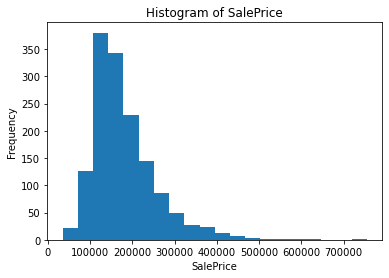

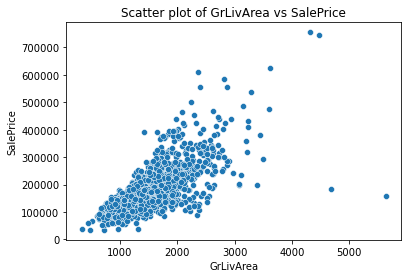

In [68]:
# Summary statistics for the target variable
print("SalePrice summary statistics:")
print(data['SalePrice'].describe())

# Histogram of the target variable
plt.hist(data['SalePrice'], bins=20)
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.title("Histogram of SalePrice")
plt.show()

# Scatter plot of GrLivArea vs SalePrice
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Scatter plot of GrLivArea vs SalePrice")
plt.show()

In [69]:
data = pd.read_csv('house_price_train_test_sets.csv')

# Load the data into a pandas dataframe
data = data.loc[:, ['BedroomAbvGr', 'SalePrice', 'YearBuilt', 'GarageCars', 'GrLivArea', 'TotalBsmtSF', 'OverallQual']]

#Split the data into training and testing sets
train_data = data.iloc[:730]
test_data = data.iloc[730:]

#Extract the target variable (house price) and predictors
train_predictors = np.array(train_data[['BedroomAbvGr', 'YearBuilt','GarageCars','GrLivArea','TotalBsmtSF','OverallQual']])
train_target = np.array(train_data[['SalePrice']], dtype=float)

#Extract the predictors from the test data
test_predictors = np.array(test_data[['BedroomAbvGr', 'YearBuilt','GarageCars','GrLivArea','TotalBsmtSF','OverallQual']])

# Use the trained model to make predictions on the test data
y_test = reg.predict(test_predictors)

# Generate x_test
x_test = np.array(test_data[['BedroomAbvGr', 'YearBuilt','GarageCars','GrLivArea','TotalBsmtSF','OverallQual']])

#Train the linear regression model on the training data
reg = LinearRegression().fit(train_predictors, train_target)
print(reg)

LinearRegression()


In [70]:
test_predictors = np.array(test_data[['BedroomAbvGr', 'YearBuilt','GarageCars','GrLivArea','TotalBsmtSF','OverallQual']], dtype=float)
test_target = np.array(train_data[['SalePrice']], dtype=float)
# Predict the target variable using the trained model on test data
y_pred = reg.predict(test_predictors)

# Calculate the mean squared error between actual and predicted target values
mse = mean_squared_error(test_target, y_pred)

# Calculate the coefficient of determination (R^2) score
r2 = r2_score(test_target, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 12033153285.683918
R^2 Score: -0.7972968886771927


In [80]:
# Actual target values
y_true = y_test

# Predicted target values
y_pred = Ridge.predict(x_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R^2 (coefficient of determination) regression score function.
r2 = r2_score(y_true, y_pred)
print("R^2 (Coefficient of Determination) score:", r2)

TypeError: predict() missing 1 required positional argument: 'X'